In [1]:
from calciumflexanalysis import calcium_flex as cal
from calciumflexanalysis import multiplate as mp
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.patches as mpl_patches


In [2]:
def _ec50_func(x,top,bottom, ec50, hill):
    z=(ec50/x)**hill
    return (bottom + ((top-bottom)/(1+z)))   

def _ic50_func(x,top,bottom, ic50, hill):
    z=(ic50/x)**hill
    return (top - ((top-bottom)/(1+z)))

In [3]:
# text file to be read in (raw file from machine)
datafile = '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM.txt' 
datafile2 = '07052019 C4sYFP2 IBP21 IBP23 INHIBITION 300 nM to 1 nM.txt'
# plate map csv file updated by user (either the 'short' or 'long' template)
mapcsv = 'EA 30 nM act IBP74 3nM to 3 uM.csv' 
mapcsv2 = 'different compounds.csv'
# insert the 2 files into the 'CaFlexAnalysis' class
plate1 = cal.CaFlexPlate(raw_data = datafile, plate_map_file = mapcsv, inject = 60, data_type = 'new')
plate2 = cal.CaFlexPlate(raw_data = datafile2, plate_map_file = mapcsv2, inject = 60, data_type = 'old')

In [4]:
plates = [plate1, plate2]

plates = mp.CaFlexGroup(plates)

plates.titles

{'plate_1': '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM',
 'plate_2': '07052019 C4sYFP2 IBP21 IBP23 INHIBITION 300 nM to 1 nM'}

In [5]:
# plates.data

In [6]:
# plates.plate_maps

In [7]:
# plates.visualise_plates(share_y = True)

In [8]:
# plates.see_plates()

In [9]:
plates.baseline_correct()

baseline corrected!


In [10]:
plates.get_window('baseline_corrected')

(46, 56)

In [11]:
# plates.plot_conditions('baseline_corrected', title = "TRPC5-COLLINS", plate_number = True)

In [12]:
plates.group_data('baseline_corrected')

self.data updated. See self.data[baseline_corrected]['grouped']


In [13]:
plates.def_window(150, 'ratio')
plates.grouplist

all windows equal, self.window updated


['Protein', 'Type', 'Compound', 'Concentration', 'Concentration Units']

In [14]:
plates.amplitude('baseline_corrected')

self.processed_data['plateau']['data'] updated for plate 1.
self.processed_data['plateau']['data'] updated for plate 2.


In [20]:
# self.data['baseline_corrected']['grouped']

{'data':     Well ID      Type                 Contents Compound  Protein  \
 0        A1   control                  EA+DMSO     none  EA [30]   
 1        A2   control                  EA+DMSO     none  EA [30]   
 2        A3   control                  EA+DMSO     none  EA [30]   
 3        A4   control                  EA+DMSO     none  EA [30]   
 4        A5   control                  EA+DMSO     none  EA [30]   
 ..      ...       ...                      ...      ...      ...   
 187      H8  compound  EA(30 nM) +IBP23 (1 nM)    IBP23  EA [30]   
 188      H9  compound  EA(30 nM) +IBP23 (1 nM)    IBP23  EA [30]   
 189     H10  compound  EA(30 nM) +IBP23 (1 nM)    IBP23  EA [30]   
 190     H11  compound  EA(30 nM) +IBP23 (1 nM)    IBP23  EA [30]   
 191     H12  compound  EA(30 nM) +IBP23 (1 nM)    IBP23  EA [30]   
 
     Concentration Concentration Units Row  Column  Valid  ...        51  \
 0            none                  nM   A       1   True  ...  2.620893   
 1        

In [15]:
# plates.mean_amplitude(combine = True)

,Protein,Type,Compound,Concentration,Concentration Units,Amplitude,Amplitude Error
0,-1,blank,-1,-1.0,-1,0.266241,0.271226
1,-1,empty,-1,-1.0,-1,NaN,NaN
2,EA [30],compound,IBP21,1.0,nM,1.212452,0.033602
3,EA [30],compound,IBP21,3.0,nM,1.100564,0.030335
4,EA [30],compound,IBP21,10.0,nM,0.829658,0.030462
5,EA [30],compound,IBP21,30.0,nM,0.405245,0.028458
6,EA [30],compound,IBP21,100.0,nM,0.016596,0.004194
7,EA [30],compound,IBP21,300.0,nM,0.008430,0.007285
8,EA [30],compound,IBP23,1.0,nM,0.795568,0.109557
9,EA [30],compound,IBP23,3.0,nM,0.986874,0.059617


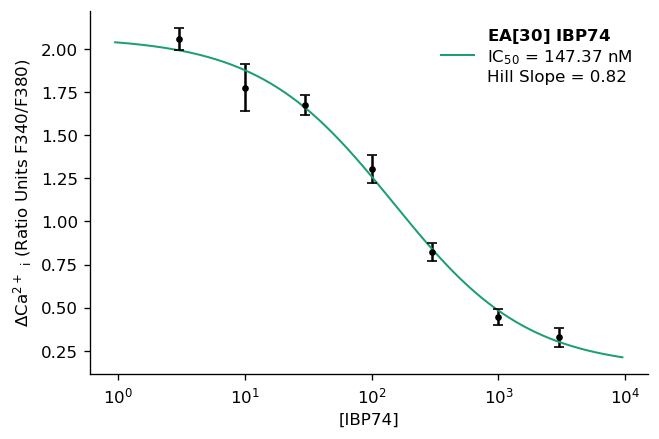

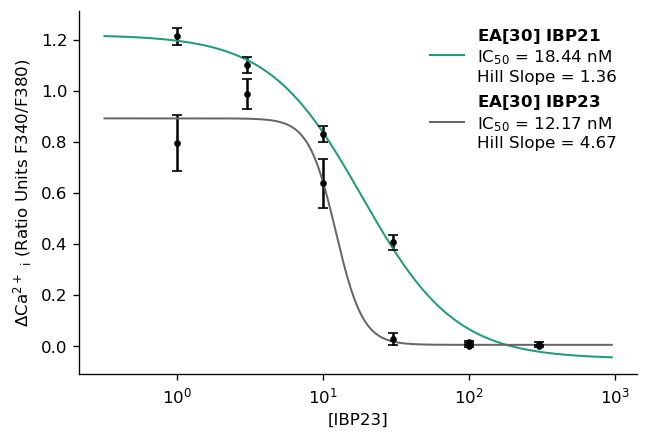

In [16]:
plates.plot_curve('ic50', combine = True)